In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

omega_0 = 57759010005.79707 +/- 44234.48845876736
Omega = 6638152.234703342 +/- 111473.39543443453


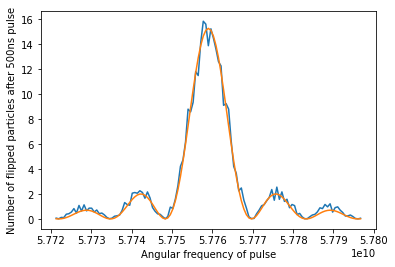

This is a 6638152.234703342 * 5e-07 = 3.319076117351671 pulse (approximately a pi-pulse).
The operator corresponding to a rotation around the y axis by 3.319076117351671 radians is
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-0.0886253  -0.99606504]
 [ 0.99606504 -0.0886253 ]]
So the new state is Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.0886253 ]
 [ 0.99606504]]


In [2]:
# Problem 1
data = np.genfromtxt('RabiData.csv', delimiter=',').T
# convert frequency to angular frequency
omega = data[0] * 2 * np.pi
population = data[1]
t = 500e-9

def p(w, amplitude, w_0, Omega):
    return amplitude * (Omega**2 / (Omega**2 + (w-w_0)**2)) * \
        np.sin( np.sqrt(Omega**2 + (w-w_0)**2) * t/2 )**2

p0=[16, 5.776e10, 5e6]
popt, pcov = curve_fit(p, omega, population, p0)
print(f"omega_0 = {popt[1]} +/- {np.sqrt(pcov[1,1])}")
print(f"Omega = {popt[2]} +/- {np.sqrt(pcov[2,2])}")
plt.plot(omega, population)
plt.plot(omega, p(omega, *popt))
plt.xlabel("Angular frequency of pulse")
plt.ylabel("Number of flipped particles after 500ns pulse")
plt.show()

phi = float(popt[2]) * t
print(f"This is a {float(popt[2])} * {t} = {phi} pulse (approximately a pi-pulse).")
print(f"The operator corresponding to a rotation around the y axis by {phi} radians is")
Rz = (qt.sigmay() * phi * (0-0.5j)).expm()
final_state = Rz * qt.basis(2, 0)
print(Rz)
print(f"So the new state is {final_state}")

For all of these graphs, case (i) is in blue, case (ii) is in orange, case (iii) is in green


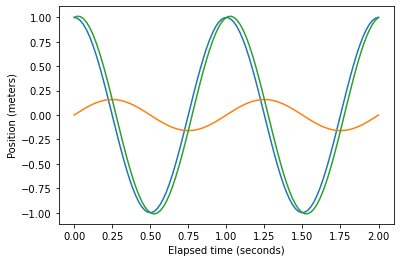

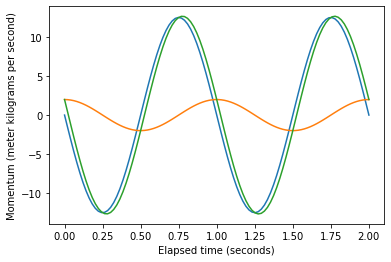

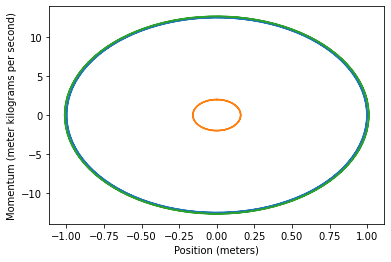

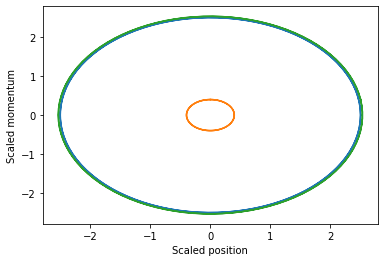

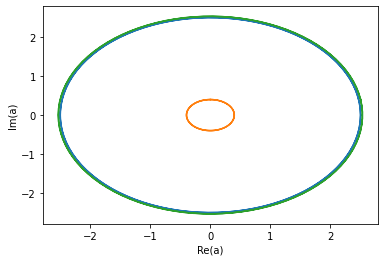

In [3]:
# Problem 2
omega = 2 * np.pi  # Hertz
m = 2  # kilograms

def plot_data(x_0, v_0):
    # Returns a list of times, positions, and momenta for plotting
    kinetic_energy = m * v_0**2 / 2
    potential_energy = m * omega**2 * x_0**2 / 2
    total_energy = kinetic_energy + potential_energy
    amplitude = np.sqrt(2 * total_energy / (m * omega**2))
    phase = np.arctan2(x_0, v_0 / omega)

    t = np.linspace(0, 2, 100)
    x = amplitude * np.sin(omega * t + phase)
    p = m * amplitude * omega * np.cos(omega * t + phase)
    return t, x, p

print("For all of these graphs, case (i) is in blue, case (ii) is in orange, case (iii) is in green")
t_i  , x_i  , p_i   = plot_data(1, 0)
t_ii , x_ii , p_ii  = plot_data(0, 1)
t_iii, x_iii, p_iii = plot_data(1, 1)

plt.plot(t_i  , x_i  )
plt.plot(t_ii , x_ii )
plt.plot(t_iii, x_iii)
plt.xlabel("Elapsed time (seconds)")
plt.ylabel("Position (meters)")
plt.show()

plt.plot(t_i  , p_i  )
plt.plot(t_ii , p_ii )
plt.plot(t_iii, p_iii)
plt.xlabel("Elapsed time (seconds)")
plt.ylabel("Momentum (meter kilograms per second)")
plt.show()

plt.plot(x_i  , p_i  )
plt.plot(x_ii , p_ii )
plt.plot(x_iii, p_iii)
plt.xlabel("Position (meters)")
plt.ylabel("Momentum (meter kilograms per second)")
plt.show()

x_i   *= np.sqrt(m * omega / 2)
x_ii  *= np.sqrt(m * omega / 2)
x_iii *= np.sqrt(m * omega / 2)
p_i   /= np.sqrt(m * omega * 2)
p_ii  /= np.sqrt(m * omega * 2)
p_iii /= np.sqrt(m * omega * 2)
plt.plot(x_i  , p_i  )
plt.plot(x_ii , p_ii )
plt.plot(x_iii, p_iii)
plt.xlabel("Scaled position")
plt.ylabel("Scaled momentum")
plt.show()

plt.plot(x_i  , p_i  )
plt.plot(x_ii , p_ii )
plt.plot(x_iii, p_iii)
plt.xlabel("Re(a)")
plt.ylabel("Im(a)")
plt.show()

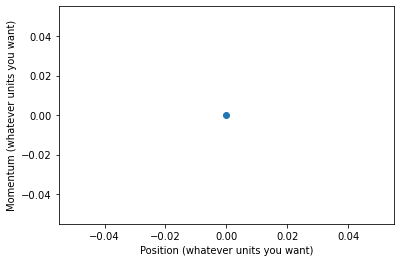

In [4]:
# Problem 3
plt.xlabel("Position (whatever units you want)")
plt.ylabel("Momentum (whatever units you want)")
plt.scatter(0, 0)
plt.show()

In [5]:
# Problem 4
N = 6
print(f"For this problem, ignore |n> if n > {N-1}\n")
a = qt.destroy(N)

print("Part (a):\n")
zero = qt.basis(N, 0)
print(a * zero)
print(a.dag() * zero)

print("\nPart (b):\n")
three = qt.basis(N, 3)
four = qt.basis(N, 4)
print(a * three)
print(a.dag() * four)

print("\nPart (c):\n")
hbar = 1
m = 1
omega = 2 * np.pi
x = np.sqrt(hbar / 2 / m / omega) * (a + a.dag())
p = (0-1j) * np.sqrt(hbar * m * omega / 2) * (a - a.dag())
Psi = (zero + three).unit()
print(f"<x> = {qt.expect(x, Psi)}")
print(f"<p> = {qt.expect(p, Psi)}")

For this problem, ignore |n> if n > 5

Part (a):

Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

Part (b):

Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [1.73205081]
 [0.        ]
 [0.        ]
 [0.        ]]
Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [2.23606798]]

Part (c):

<x> = 0.0
<p> = 0.0


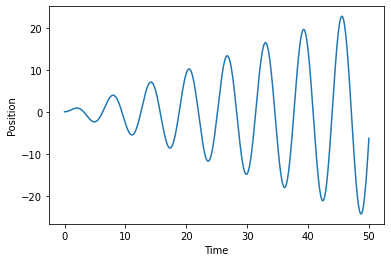

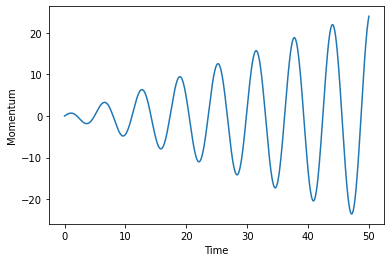

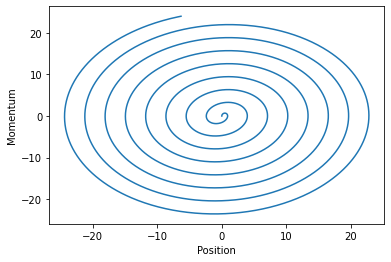

In [60]:
# Problem 5.a
# Assume F_0, mass, and omega are all 1
dt = 0.01
t = [0]
x = [0]
p = [0]
for i in range(5000):
    t.append(t[-1] + dt)
    p.append(p[-1] + (np.cos(t[-1]) - x[-1]) * dt)
    x.append(x[-1] + p[-1] * dt)
plt.plot(t, x)
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()
plt.plot(t, p)
plt.xlabel("Time")
plt.ylabel("Momentum")
plt.show()
plt.plot(x, p)
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.show()

For this problem, ignore |n> if n > 69



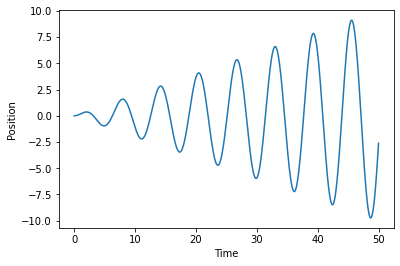

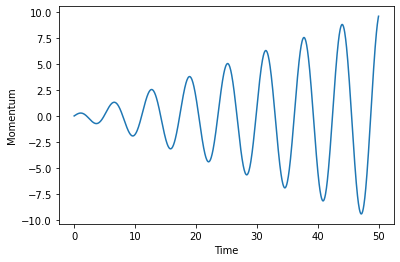

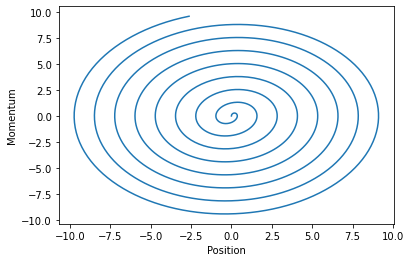

In [16]:
# Problem 5.b
# The higher N is and the smaller time is, the better the approximation
N = 70
print(f"For this problem, ignore |n> if n > {N-1}\n")
a = qt.destroy(N)
x = a + a.dag()
p = (0-1j) * (a - a.dag())
F_0 = 0.2
def H(t):
    return (qt.num(N) + qt.qeye(N) / 2) - x * np.cos(t) * F_0

initial_state = qt.basis(N, 0)
times = np.linspace(0, 50, 1000)
evolved_states = qt.sesolve(H, initial_state, times, e_ops=[x, p])
positions = evolved_states.expect[0]
momenta = evolved_states.expect[1]
plt.plot(times, positions)
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()
plt.plot(times, momenta)
plt.xlabel("Time")
plt.ylabel("Momentum")
plt.show()
plt.plot(positions, momenta)
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.show()